#Qual a quantidade mínima de cores para colorir o mapa do Brasil de forma que dois estados vizinhos não possuam a mesma cor?

#Algoritmo proposto para a solução do problema.

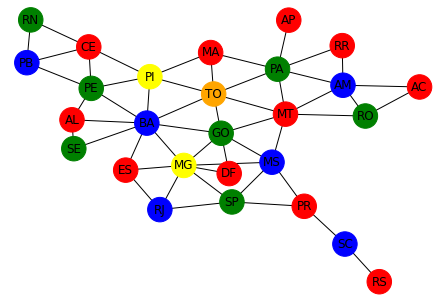

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
color_map = []
colors_of_nodes={}

colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink', 'Black', 'White', 'Gray', 'Purple', 'Brown', 'Navy']

G.add_nodes_from(['AC','AL','AP','AM','BA','CE','DF','ES','GO',
                  'MA','MT','MS','MG','PA','PB','PR','PE','PI',
                  'RJ','RN','RS','RO','RR','SC','SP','SE','TO'])

#fronteiras = {'AC': ['AM','RO'],
#             'AL': ['PE','SE','BA'],
#            'CE': ['PI','RN','PB','PE']}
#G.add_edges_from(fronteiras)


G.add_edges_from([('CE','PI'),('CE','RN'),('CE','PB'),('CE','PE'),
                  ('MA','PA'),('MA','TO'),('MA','PI'),
                  ('RN','PB'),('RN','CE'),
                  ('PB','RN'),('PB','CE'),('PB','PE'),
                  ('AL','PE'),('AL','SE'),('AL','BA'),
                  ('SE','AL'),('SE','BA'),
                  ('PI','TO'),('PI','MA'),('PI','BA'),('PI','CE'),('PI','PE'),
                  ('BA','MG'),('BA','GO'),('BA','TO'),('BA','PI'),('BA','PE'),('BA','AL'),('BA','SE'),('BA','ES'),
                  ('PE','PB'),('PE','CE'),('PE','PI'),('PE','BA'),('PE','AL'),
                  ('AC','AM'),('AC','RO'),
                  ('AM','AC'),('AM','RR'),('AM','RO'),('AM','MT'),('AM','PA'),
                  ('MG','ES'),('MG','RJ'),('MG','SP'),('MG','GO'),('MG','DF'),('MG','BA'),('MG','MS'),
                  ('MS','PR'),('MS','SP'),('MS','MG'),('MS','GO'),('MS','MT'),
                  ('MT','RO'),('MT','AM'),('MT','PA'),('MT','TO'),('MT','GO'),('MT','MS'),
                  ('PA','AP'),('PA','MA'),('PA','TO'),('PA','MT'),('PA','AM'),('PA','RR'),
                  ('GO','DF'),('GO','TO'),('GO','BA'),('GO','MG'),('GO','MS'),('GO','MT'),
                  ('TO','MA'),('TO','PI'),('TO','BA'),('TO','GO'),('TO','MT'),('TO','PA'),
                  ('SP','MG'),('SP','RJ'),('SP','PR'),('SP','MS'),
                  ('ES','MG'),('ES','RJ'),('ES','BA'),
                  ('RO','AC'),('RO','AM'),('RO','MT'),
                  ('RJ','MG'),('RJ','ES'),('RJ','SP'),
                  ('PR','SP'),('PR','SC'),('PR','MS'),
                  ('DF','GO'),('DF','MG'),
                  ('SC','PR'),('SC','RS'),
                  ('RR','AM'),('RR','PA'),
                  ('RS','SC'),
                  ('AP','PA')])



def coloring(node, color):
   for neighbor in G.neighbors(node):
       color_of_neighbor = colors_of_nodes.get(neighbor, None)
       if color_of_neighbor == color:
          return False

   return True

def get_color_for_node(node):
    for color in colors:
       if coloring(node, color):
          return color

def main():
    for node in G.nodes():
        colors_of_nodes[node] = get_color_for_node(node)
        color_map.append(get_color_for_node(node))
    #print (colors_of_nodes)
    #nx.draw(G, with_labels=True, pos=nx.circular_layout(G), node_color= color_map , node_size= 600)
    #nx.draw(G, with_labels=True, pos=nx.spring_layout(G), node_color= color_map , node_size= 600)
    #nx.draw_planar(G, with_labels=True, node_color= color_map , node_size= 600)
    nx.draw_kamada_kawai(G, with_labels=True, node_color= color_map , node_size= 600)
    #nx.draw_spectral(G, with_labels=True, node_color= color_map , node_size= 600)
    #plt.rcParams["figure.figsize"] = (11,6) # Set a tuple with width and height.
    #plt.figure(figsize=(.1,.1))
    plt.show()

main()        

# A saída do algoritmo gera uma lista de dicionários onde cada estado representado por duas letras corresponde à "chave do dicionário" e cada cor corresponde ao "valor do dicionário". 

In [3]:
print (colors_of_nodes)

{'AC': 'Red', 'AL': 'Red', 'AP': 'Red', 'AM': 'Blue', 'BA': 'Blue', 'CE': 'Red', 'DF': 'Red', 'ES': 'Red', 'GO': 'Green', 'MA': 'Red', 'MT': 'Red', 'MS': 'Blue', 'MG': 'Yellow', 'PA': 'Green', 'PB': 'Blue', 'PR': 'Red', 'PE': 'Green', 'PI': 'Yellow', 'RJ': 'Blue', 'RN': 'Green', 'RS': 'Red', 'RO': 'Green', 'RR': 'Red', 'SC': 'Blue', 'SP': 'Green', 'SE': 'Green', 'TO': 'Orange'}


#Para remover os valores repetidos (cores) devemos gerar um outro algoritmo que fornece em sua saída a quantidade mínima de cores para solução do problema.

In [5]:
temp = []
res = dict()
for key, val in colors_of_nodes.items():
    if val not in temp:
        temp.append(val)
        res[key] = val

print("Solução: a quantidade mínima de cores para resolver o problema é", len(temp), ".",'\n' )
print("No grafo os estados estão representados pelas cores:", temp, ".")

Solução: a quantidade mínima de cores para resolver o problema é 5 . 

No grafo os estados estão representados pelas cores: ['Red', 'Blue', 'Green', 'Yellow', 'Orange'] .
